# The Butterfly Effect

Chloe Cousin - Online Jan 24 Data Science cohort

- __Sprint__: 2 - more advanced preprocessing, EDA and baseline model creation
- __Date__: April 2, 2024

# Introduction

## Imports

In [94]:
# Base packages
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Stats
from scipy import stats

# Time Series
from statsmodels.api import tsa
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Datasets

### D1 - Butterfly sightings / Traits / Vulnerable Species

This dataset has been preprocessed in Sprint 1 (see 'Capstone - Sprint 1' Jupyter notebook), we are importing the cleaned file here.

NOTE : EXPLIQUER CE QUI A ETE FAIT

In [13]:
df = pd.read_csv('data/df_NBN_UKBMS4.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,Unnamed: 0,Occurrence_ID,Scientific_name,Common_name,Start_date,Start_date_day,Start_date_month,Start_date_year,OSGR,Latitude_WGS84,Longitude_WGS84,Family,Genus,OSGR_100km,OSGR_10km,OSGR_2km,OSGR_1km,State/Province,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,FlightDuration,Voltinism,CanopyAffinity,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,Red_List_category,2010_Red_List_category,Year_Month
0,0,5616398,Gonepteryx rhamni,Brimstone,2009-03-16,16,3,2009,TL2550,52.138550,-0.167627,Pieridae,Gonepteryx,TL,TL25,TL25K,TL2550,England,5.2,6.40,5.2,6.40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,11.0,B,Mixed canopy (open affinity),Edge-associated (strong),Moisture association varies,Disturbance-associated (strong),2.0,Least Concern,Least Concern,2009-03-01
1,1,7628186,Gonepteryx rhamni,Brimstone,2009-03-18,18,3,2009,SU8533,51.094445,-0.780437,Pieridae,Gonepteryx,SU,SU83,SU83L,SU8533,England,5.2,6.40,5.2,6.40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,11.0,B,Mixed canopy (open affinity),Edge-associated (strong),Moisture association varies,Disturbance-associated (strong),2.0,Least Concern,Least Concern,2009-03-01
2,2,5815274,Polygonia c-album,Comma,2009-03-22,22,3,2009,TQ1684,51.547376,-0.321280,Nymphalidae,Polygonia,TQ,TQ18,TQ18S,TQ1684,England,4.0,5.20,4.1,4.90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Canopy generalist,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,Least Concern,Least Concern,2009-03-01
3,3,5616417,Pieris brassicae,Large White,2009-03-07,7,3,2009,ST7913,50.920590,-2.293015,Pieridae,Pieris,ST,ST71,ST71W,ST7913,England,5.1,5.85,4.9,5.65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Mixed canopy (open affinity),Seen near and away from edges,Xeric-associated (weak),Disturbance-associated (strong),6.0,Least Concern,Least Concern,2009-03-01
4,4,5616482,Polygonia c-album,Comma,2009-03-19,19,3,2009,SU6469,51.420852,-1.073789,Nymphalidae,Polygonia,SU,SU66,SU66P,SU6469,England,4.0,5.20,4.1,4.90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Canopy generalist,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,Least Concern,Least Concern,2009-03-01


In [15]:
df = df.drop(columns='Unnamed: 0')

In [19]:
df['Year_Month'] = pd.to_datetime(df['Year_Month'])
df['Start_date'] = pd.to_datetime(df['Start_date'])

In [20]:
df.shape

(6392186, 43)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392186 entries, 0 to 6392185
Data columns (total 43 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Occurrence_ID              int64         
 1   Scientific_name            object        
 2   Common_name                object        
 3   Start_date                 datetime64[ns]
 4   Start_date_day             int64         
 5   Start_date_month           int64         
 6   Start_date_year            int64         
 7   OSGR                       object        
 8   Latitude_WGS84             float64       
 9   Longitude_WGS84            float64       
 10  Family                     object        
 11  Genus                      object        
 12  OSGR_100km                 object        
 13  OSGR_10km                  object        
 14  OSGR_2km                   object        
 15  OSGR_1km                   object        
 16  State/Province             object   

### D2 - UK Weather

In [ ]:
df_london_weather = pd.read_fwf('data/heathrowdata.txt')

In [ ]:
df_london_weather.head()

In [ ]:
df_london_weather.shape

# EDA and Data Preprocessing

Steps:

- Indexing sightings per year and month:
    - Get the number of surveys per year 

## Get London sightings

London coordinates: 51.5069929036787, -0.12895107981895967

- North limit (Enfield borough): 51.65195042315941, -0.08106613267368643
- West limit (Hillington borough): 51.537921096083025, -0.45221704012735686 
- South limit (Croydon borough): 51.3769109423846, -0.09758628303502302
- East Limit (Upminster): 51.55626396921364, 0.24955389351473162

In [23]:
London_coord = {'North limit (Enfield borough)': [51.65195042315941, -0.08106613267368643],
                'West limit (Hillington borough)': [51.537921096083025, -0.45221704012735686],
                'South limit (Croydon borough)': [51.3769109423846, -0.09758628303502302], 
                'East Limit (Upminster)': [51.55626396921364, 0.24955389351473162]}
London_coord_df = pd.DataFrame(London_coord, index=['Latitude', 'Longitude']).T
London_coord_df

,Latitude,Longitude
North limit (Enfield borough),51.651950,-0.081066
West limit (Hillington borough),51.537921,-0.452217
South limit (Croydon borough),51.376911,-0.097586
East Limit (Upminster),51.556264,0.249554


In [24]:
print(f"Min Lat value: {London_coord_df['Latitude'].min()}")
print(f"Max Lat value: {London_coord_df['Latitude'].max()}")
print(f"Min Lon value: {London_coord_df['Longitude'].min()}")
print(f"Max Lon value: {London_coord_df['Longitude'].max()}")

Min Lat value: 51.3769109423846
Max Lat value: 51.65195042315941
Min Lon value: -0.45221704012735686
Max Lon value: 0.24955389351473162


In [25]:
GLondon_df = df[(df['Latitude_WGS84'] >= London_coord_df['Latitude'].min()) & \
                (df['Latitude_WGS84'] <= London_coord_df['Latitude'].max()) & \
                (df['Longitude_WGS84'] >= London_coord_df['Longitude'].min()) & \
                (df['Longitude_WGS84'] <= London_coord_df['Longitude'].max())]

In [26]:
GLondon_df.describe()

,Occurrence_ID,Start_date,Start_date_day,Start_date_month,Start_date_year,Latitude_WGS84,Longitude_WGS84,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,FlightDuration,NumberOfHostplantFamilies,Year_Month
count,1.628870e+05,162887,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887
mean,4.165022e+06,2012-10-02 12:11:04.362410752,15.594510,6.709259,2012.240627,51.501557,-0.180515,3.110379,4.483747,3.599826,4.326599,0.416368,0.498229,0.843603,0.714409,0.964970,0.915021,0.989809,0.915021,0.965160,0.824154,0.408461,0.299214,8.754419,4.187885,2012-09-17 21:54:58.672085504
min,6.000000e+00,2001-03-25 00:00:00,1.000000,3.000000,2001.000000,51.379167,-0.440290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-03-01 00:00:00
25%,1.829190e+06,2008-07-21 00:00:00,8.000000,6.000000,2008.000000,51.438260,-0.281758,2.350000,3.800000,3.400000,3.800000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,7.000000,1.000000,2008-07-01 00:00:00
50%,4.888200e+06,2013-07-18 00:00:00,16.000000,7.000000,2013.000000,51.497967,-0.182863,3.700000,4.500000,3.600000,4.400000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,9.000000,2.000000,2013-07-01 00:00:00
75%,6.374192e+06,2017-08-26 00:00:00,23.000000,8.000000,2017.000000,51.562974,-0.034953,3.900000,4.700000,3.900000,4.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000,2017-08-01 00:00:00
max,8.168492e+06,2020-10-19 00:00:00,31.000000,10.000000,2020.000000,51.649494,0.124656,5.900000,7.600000,5.500000,6.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,24.000000,2020-10-01 00:00:00
std,2.476279e+06,NaN,8.773763,1.394315,5.550457,0.073003,0.149540,1.613779,1.038287,0.875043,1.012160,0.492958,0.499998,0.363232,0.451697,0.183857,0.278852,0.100436,0.278852,0.183375,0.380690,0.491551,0.457915,2.890142,4.537040,NaN


In [27]:
GLondon_df.shape

(162887, 43)

## Indexing sightings per Year/Month

In [28]:
GLondon_df.head()

,Occurrence_ID,Scientific_name,Common_name,Start_date,Start_date_day,Start_date_month,Start_date_year,OSGR,Latitude_WGS84,Longitude_WGS84,Family,Genus,OSGR_100km,OSGR_10km,OSGR_2km,OSGR_1km,State/Province,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,FlightDuration,Voltinism,CanopyAffinity,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,Red_List_category,2010_Red_List_category,Year_Month
2,5815274,Polygonia c-album,Comma,2009-03-22,22,3,2009,TQ1684,51.547376,-0.321280,Nymphalidae,Polygonia,TQ,TQ18,TQ18S,TQ1684,England,4.0,5.2,4.1,4.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Canopy generalist,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,Least Concern,Least Concern,2009-03-01
22,7657450,Polygonia c-album,Comma,2009-03-22,22,3,2009,TQ1684,51.547376,-0.321280,Nymphalidae,Polygonia,TQ,TQ18,TQ18S,TQ1684,England,4.0,5.2,4.1,4.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Canopy generalist,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,Least Concern,Least Concern,2009-03-01
45,5815276,Polygonia c-album,Comma,2009-03-21,21,3,2009,TQ1583,51.538594,-0.336023,Nymphalidae,Polygonia,TQ,TQ18,TQ18L,TQ1583,England,4.0,5.2,4.1,4.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Canopy generalist,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,Least Concern,Least Concern,2009-03-01
50,5815272,Polygonia c-album,Comma,2009-03-22,22,3,2009,TQ1684,51.547376,-0.321280,Nymphalidae,Polygonia,TQ,TQ18,TQ18S,TQ1684,England,4.0,5.2,4.1,4.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Canopy generalist,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,Least Concern,Least Concern,2009-03-01
92,5815262,Pieris rapae,Small White,2009-03-15,15,3,2009,TQ1583,51.538594,-0.336023,Pieridae,Pieris,TQ,TQ18,TQ18L,TQ1583,England,3.9,4.7,3.9,4.7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Mixed canopy (open affinity),Edge-associated (weak),Both,Disturbance-associated (strong),8.0,Least Concern,Least Concern,2009-03-01


### Number of sightings per Year/Month

In [122]:
# Counts of sightings per month in London sites selected
Sightings_London = GLondon_df['Year_Month'].value_counts()
Sightings_London = pd.DataFrame(Sightings_London).reset_index().sort_values('Year_Month').set_index('Year_Month')
Sightings_London.head(3)

,count
Year_Month,
2001-03-01,10
2001-04-01,197
2001-05-01,544


We have a difference of 82 months over 20 years


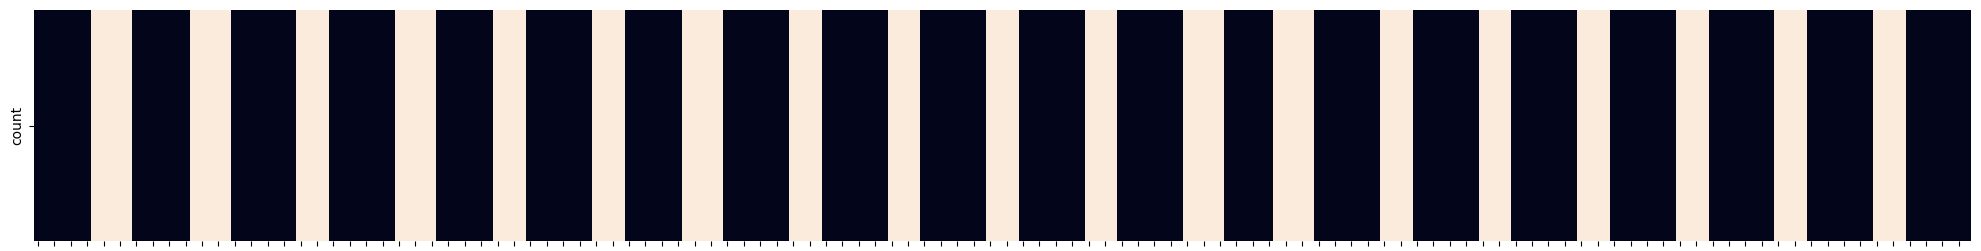

In [131]:
######### Making sure we have values for each month of each year #########

# Getting every months of each year between first and last date in the dataset 
full_index = full_range = pd.date_range(start=Sightings_London.index.min(), 
                                        end=Sightings_London.index.max(), 
                                        freq='MS')
diff_month = len(full_index.difference(Sightings_London.index))
print(f'We have a difference of {diff_month} months over 20 years')

# Reindexing sightings dataframe to full range of months
Sightings_London_2 = Sightings_London.reindex(full_index)

# See where the missing values are located
plt.figure(figsize=(25, 3))
ax = sns.heatmap(Sightings_London_2.isna().T, cbar=False)
ax.set(xticklabels=[])
plt.show()

__COMMENT:__ It looks like the missing values are located in the winter time when there is no surveys organised. The best approach to filling the missing values will therefore be to replace with 0.

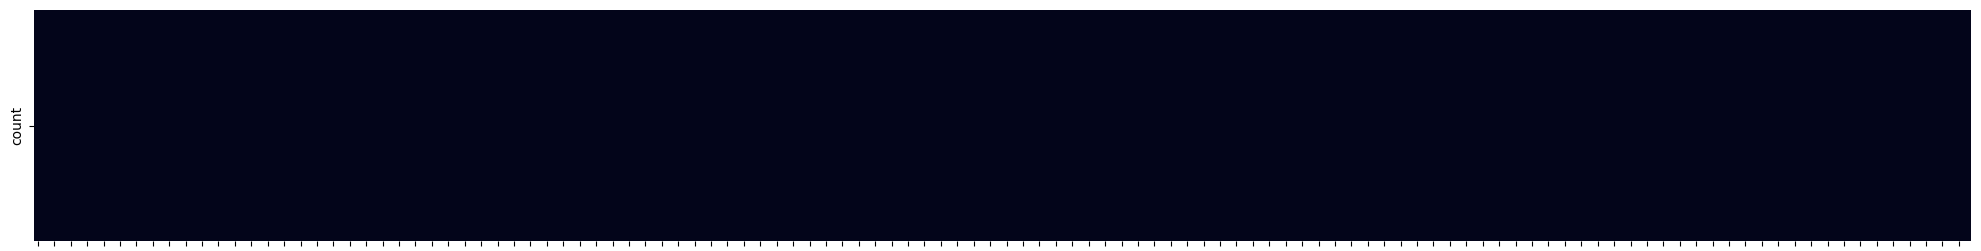

In [134]:
# Filling missing values
Sightings_London_2 = Sightings_London_2.fillna(0) #ffill means forward fill

# Sanity Check
plt.figure(figsize=(25, 3))
ax = sns.heatmap(Sightings_London_2.isna().T, cbar=False)
ax.set(xticklabels=[])
plt.show()

__COMMENT:__ All missing values have been filled, we can proceed.

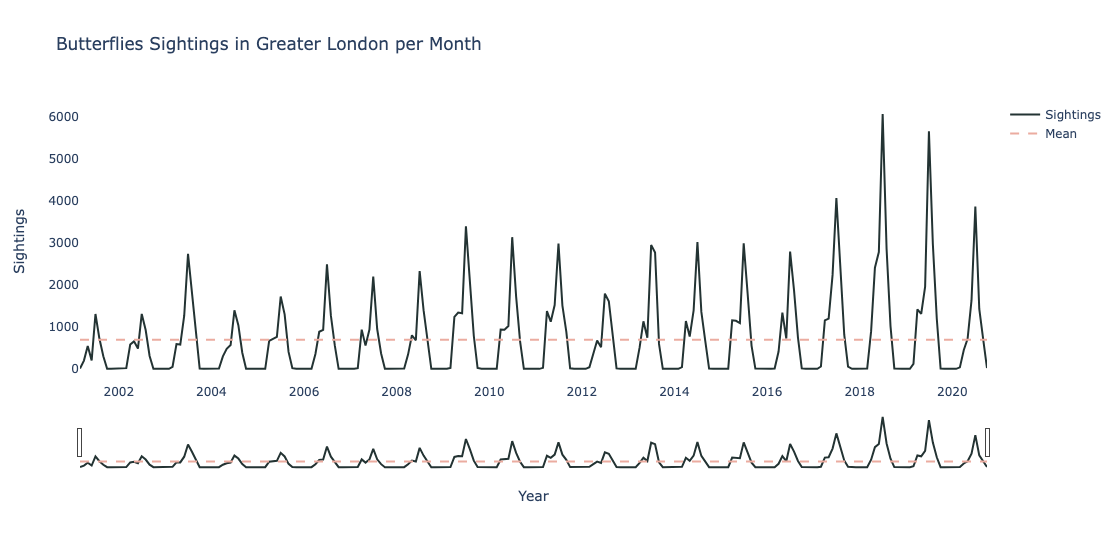

In [137]:
# Plot sightings per month
fig = go.Figure()
fig.add_trace(go.Scatter(x=Sightings_London_2.index, 
                         y=Sightings_London_2['count'], 
                         mode='lines', name='Sightings', line=dict(color='#233333')))
fig.add_trace(go.Scatter(x=Sightings_London_2.index, 
                         y=[Sightings_London_2['count'].mean()]*len(Sightings_London_2), 
                         mode='lines', name='Mean', line_dash='dash', line=dict(color='#EBACA0')))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(yaxis_title='Sightings', xaxis_title='Year',
                  title='Butterflies Sightings in Greater London per Month',
                  width = 1100, height = 550, plot_bgcolor='white', showlegend=True)
# fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False))
fig.show()

__COMMENT:__ We can see on this first plot:

- A clear seasonal pattern, with a peak in the number of Sightings in July/August each year
- What seems to be an upward trend over the years, which will need to be confirmed by a seasonal decomposition
- The number of sightings varies from year to year: starting in 2009, we have a clear increase in the number of sightings but we still see two significant drops over the years, in 2012 and 2020 (the first one would need to be researched, the second one most likely due to the pandemic).

In [141]:
Sightings_London_2

,count,Trend,Seasonal,Residual
2001-03-01,10.0,NaN,-679.717308,NaN
2001-04-01,197.0,NaN,74.833130,NaN
2001-05-01,544.0,NaN,298.947409,NaN
2001-06-01,202.0,NaN,459.502965,NaN
2001-07-01,1306.0,NaN,2242.558520,NaN
...,...,...,...,...
2020-06-01,1634.0,NaN,459.502965,NaN
2020-07-01,3863.0,NaN,2242.558520,NaN
2020-08-01,1425.0,NaN,1059.391853,NaN
2020-09-01,699.0,NaN,-22.440993,NaN


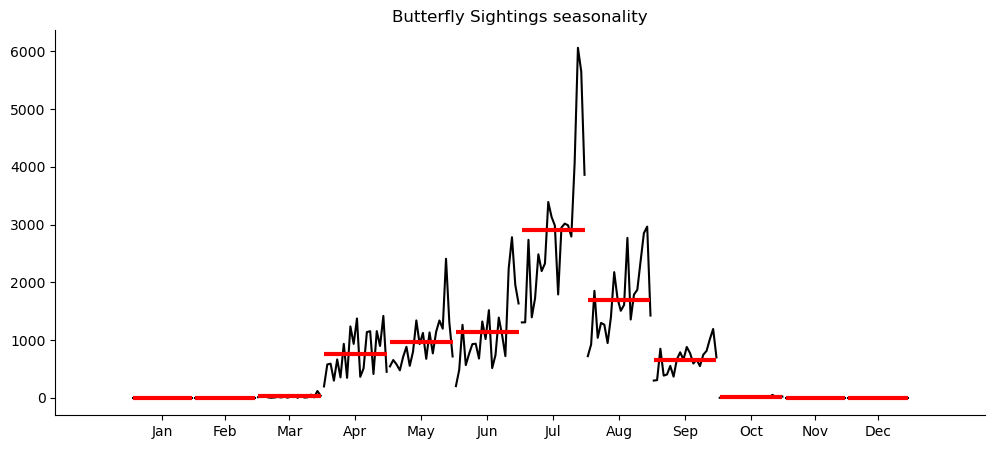

In [144]:
# Creating a seasonal plot
plt.figure(figsize=(12, 5))
month_plot(Sightings_London_2["count"], ax=plt.gca())
plt.title('Butterfly Sightings seasonality')
sns.despine()
plt.show()

__COMMENT:__ We clearly see now that the sightings increase from April to July and then decrease. We have no sightings in the cold season (October to March).

In [140]:
decomposition = tsa.seasonal_decompose(Sightings_London_2, model='additive')
Sightings_London_2["Trend"] = decomposition.trend
Sightings_London_2["Seasonal"] = decomposition.seasonal
Sightings_London_2["Residual"] = decomposition.resid

Sightings_London_2.head(5)

,count,Trend,Seasonal,Residual
2001-03-01,10.0,NaN,-679.717308,NaN
2001-04-01,197.0,NaN,74.833130,NaN
2001-05-01,544.0,NaN,298.947409,NaN
2001-06-01,202.0,NaN,459.502965,NaN
2001-07-01,1306.0,NaN,2242.558520,NaN


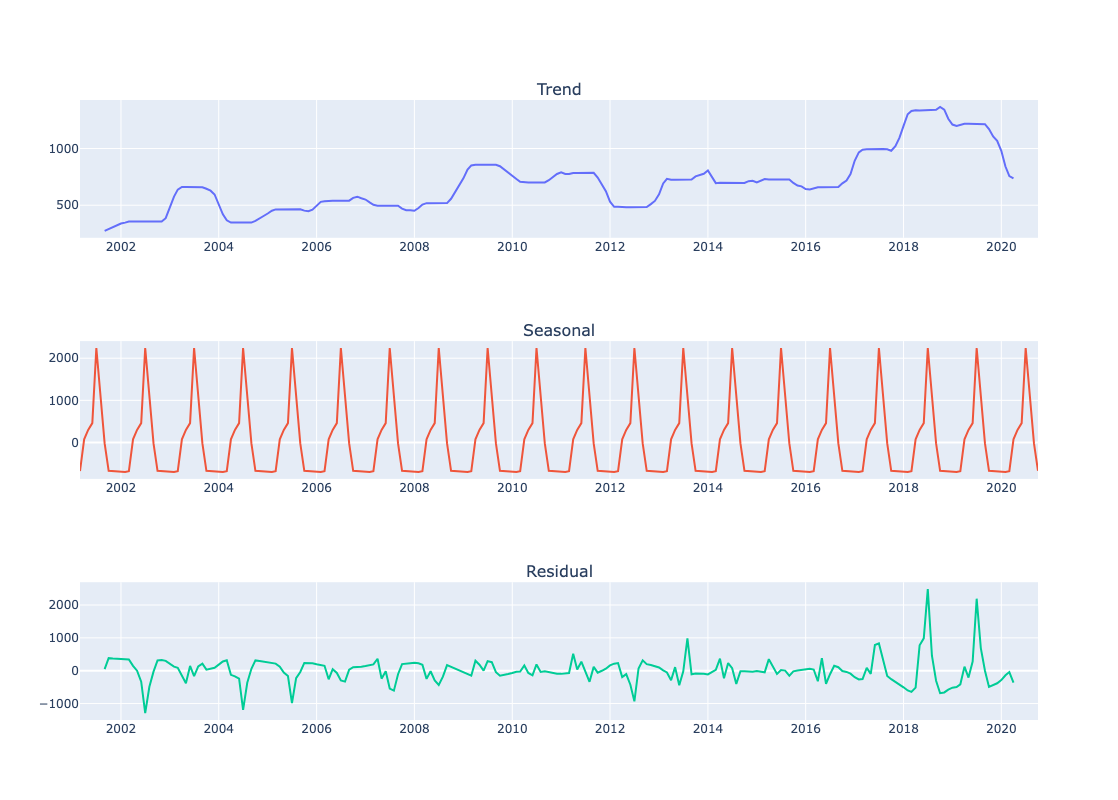

In [146]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=Sightings_London_2.index, y=Sightings_London_2[col]),
        row=i+1,
        col=1)

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()

### Number of surveys per Year/Month

# Time Series Models

# Model Evaluation

# Next steps

(Personal notes)
- Butterfly data:
    - Regroup sightings London by week or month (depending on external info found)
    - Transform into index? Log?
    - EDA - Describe observations:
        - Missing data points?
        - Note that we can't have duplicated rows
        - Exclude 2020 for pandemic? first years?
        - General trend
        - Seasonal pattern (cross info with flight duration?)
    - Baseline model: Univariate model SARIMAX
    - Find average data external info London:
        - Air quality: which pollutant to consider?
        - Weather: Temperatures, rainfall, wind, ...
    - Scale?
    - Multivariate models:
        - Check stationarity (Dickey–Fuller test)
        - VAR model (captures seasonality - needed?) / mSSA / Prophet / LSTM? / Kats? / Random forest? => Each needs stationarity?
        - Test causality (!! data needs to be non stationnary?)
        - Tune with predictions for external factors (Net Zero / Air quality... depending on which var is predictive of B pop)

__Question__: do you need to specify different lag per metric (like temperature has an impact 2 months after, pollutant 1 month after...)?

__NOTE__: how many months / year do we want to predict?

- Gather data about positive efforts towards environement in London:
    - Butterfly conservation efforts
    - No emission zone start dates
- Study by species:
    - Trend by species? Scatter coeff trend VS each LepTraits?
    - Group by vulnerability? Scatter London coeff trend VS UK vulnerability group? (attention: Zoom on London)

# _Tests

## Var Model

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
mdata = sm.datasets.macrodata.load_pandas().data
mdata.head()

In [ ]:
# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly.head()

In [ ]:
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
quarterly

In [ ]:
In [10]: mdata = mdata[['realgdp','realcons','realinv']]
mdata.head()

In [ ]:
import pandas 
mdata.index = pandas.DatetimeIndex(quarterly)
mdata.head()

In [ ]:
import numpy as np
data = np.log(mdata).diff().dropna()
data.tail()

In [ ]:
model = VAR(data)

In [ ]:
results = model.fit(2)
results.summary()

In [ ]:
results.plot()

In [ ]:
results.plot_acorr()

In [ ]:
model.select_order(15)

In [ ]:
results.test_causality('realgdp', ['realinv', 'realcons'], kind='wald', signif=0.9)

# _Archives

## D3 - UK Weighted Sightings

In [ ]:
df_Sightings_Year_Weighted = pd.read_csv('data/Sightings_year_weighted.csv')

In [ ]:
df_Sightings_Year_Weighted.head()

In [ ]:
df_Sightings_Year_Weighted.shape

In [ ]:
df_Sightings_Year_Weighted['Start_date_year'].min()

In [ ]:
df_Sightings_Year_Weighted['Start_date_year'].max()

## Weather / Sightings correlation?

Notes: Test with London temperatures for whole UK Sightings - need to be updated to UK weather data

In [ ]:
df_london_weather2 = df_london_weather[(df_london_weather['yyyy'] >= 2001) & (df_london_weather['yyyy'] <= 2020)]
df_london_weather2

In [ ]:
df_london_weather2 = pd.DataFrame(df_london_weather2.groupby('yyyy')['tmax'].mean()).reset_index()

In [ ]:
# Merge Sightings and Weather
df_Sightings_Year_Weighted2 = pd.merge(df_Sightings_Year_Weighted, df_london_weather2, left_on='Start_date_year', right_on='yyyy', 
                                       how='left')

In [ ]:
df_Sightings_Year_Weighted2 = df_Sightings_Year_Weighted2.drop(columns=['Unnamed: 0', 'index', 'count', 'weight', 'yyyy'])

In [ ]:
plt.subplots(1,2, figsize=[15,6])

plt.subplot(1,2,1)
plt.plot(df_Sightings_Year_Weighted2['Start_date_year'], df_Sightings_Year_Weighted2['tmax'])
plt.title('Temperatures')

plt.subplot(1,2,2)
plt.plot(df_Sightings_Year_Weighted2['Start_date_year'], df_Sightings_Year_Weighted2['counts_weighted'])
plt.title('Weighted sightings')

plt.tight_layout()
plt.show()

In [ ]:
sns.heatmap(df_Sightings_Year_Weighted2.corr(), annot=True)

In [ ]:
stats.pearsonr(df_Sightings_Year_Weighted2['tmax'], df_Sightings_Year_Weighted2['counts_weighted'])

In [ ]:
stats.pearsonr(df_Sightings_Year_Weighted2['tmax'], df_Sightings_Year_Weighted2['Start_date_year'])